In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

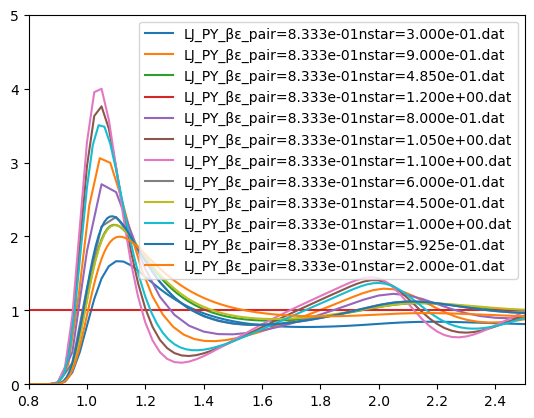

In [15]:
import glob


# Define the pattern, using wildcards for the numbers
pattern = "LJ_PY_βε_pair=8.333e-01*nstar=*.dat"

# Use glob to find all files matching the pattern
file_list = glob.glob(pattern)
data_list = [read_csv(gofr_file, header=0, delim_whitespace=True) for gofr_file in file_list]

fig, ax = plt.subplots()
for file, data in zip(file_list, data_list):
    ax.plot(data['r[σ]'], data['g_ii'], label=file)
    
ax.set_ylim(0,5)
ax.set_xlim(0.8,2.5)
ax.legend()


/tmp/ipykernel_2855835/776287766.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('plasma')


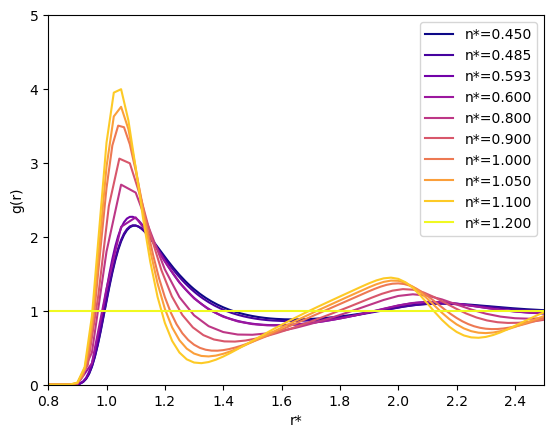

In [31]:
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap

# Define the pattern, using wildcards for the numbers
pattern = "LJ_PY_βε_pair=8.333e-01*nstar=*.dat"

# Use glob to find all files matching the pattern
file_list = glob.glob(pattern)

# Function to extract density from file name
def extract_density(file_name):
    match = re.search(r'nstar=(\d\.\d+e[-+]?\d*)\.dat', file_name)
    if match:
        return float(match.group(1))
    return None

# Extract densities and create a list of tuples (density, file_name)
files_with_density = [(extract_density(file), file) for file in file_list]

# Sort the list by density
files_with_density.sort()

# Separate sorted file list and densities
sorted_files = [file for _, file in files_with_density]
densities = [density for density, _ in files_with_density]

# Load data from files
data_list = [pd.read_csv(file, header=0, delim_whitespace=True) for file in sorted_files]

# Set up the plot
fig, ax = plt.subplots()

# Get the plasma colormap
cmap = get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(sorted_files)))

# Plot each file's data with a corresponding color
for file, data, color in zip(sorted_files, data_list, colors):
    ax.plot(data['r[σ]'], data['g_ii'], label=f'n*={extract_density(file):.3f}', color=color)
    
long_range_inspection=False
if long_range_inspection:
    ax.set_ylim(None, None)
    ax.set_xlim(0.8, None)
    ax.set_yscale('symlog', linthresh=1e-6)
    ax.set_xscale('log')
else:
    ax.set_ylim(0, 5)
    ax.set_xlim(0.8, 2.5)

ax.set_ylabel("g(r)")
ax.set_xlabel("r*")
ax.legend()
plt.show()


/tmp/ipykernel_2855835/1916800913.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('plasma')


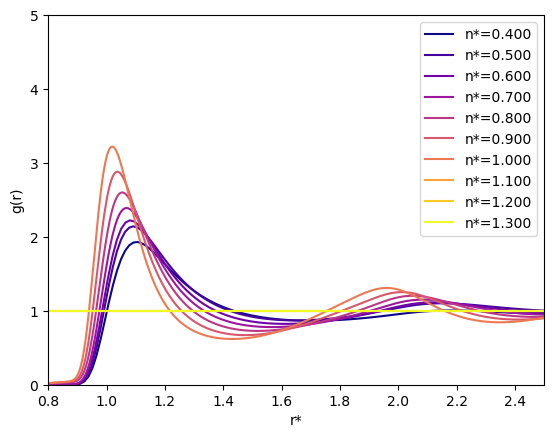

In [33]:
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap

# Define the pattern, using wildcards for the numbers
pattern = "LJ_HNC_βε_pair=8.333e-01*nstar=*.dat"

# Use glob to find all files matching the pattern
file_list = glob.glob(pattern)

# Function to extract density from file name
def extract_density(file_name):
    match = re.search(r'nstar=(\d\.\d+e[-+]?\d*)\.dat', file_name)
    if match:
        return float(match.group(1))
    return None

# Extract densities and create a list of tuples (density, file_name)
files_with_density = [(extract_density(file), file) for file in file_list]

# Sort the list by density
files_with_density.sort()

# Separate sorted file list and densities
sorted_files = [file for _, file in files_with_density]
densities = [density for density, _ in files_with_density]

# Load data from files
data_list = [pd.read_csv(file, header=0, delim_whitespace=True) for file in sorted_files]

# Set up the plot
fig, ax = plt.subplots()

# Get the plasma colormap
cmap = get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(sorted_files)))

# Plot each file's data with a corresponding color
for file, data, color in zip(sorted_files, data_list, colors):
    ax.plot(data['r[σ]'], data['g_ii'], label=f'n*={extract_density(file):.3f}', color=color)
    
long_range_inspection=False
if long_range_inspection:
    ax.set_ylim(None, None)
    ax.set_xlim(0.8, None)
    ax.set_yscale('symlog', linthresh=1e-6)
    ax.set_xscale('log')
else:
    ax.set_ylim(0, 5)
    ax.set_xlim(0.8, 2.5)

ax.set_ylabel("g(r)")
ax.set_xlabel("r*")
ax.legend()
plt.show()
